#### Steps in Machine Learning 
* Data Exploration
* Data cleaning 
* Splitting - train and test 
* Data preprocessing
* Model Fitting
* Model evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.linear_model as lm 
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

#### Data Exploration

In [2]:
hfd = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
hfd.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1


In [4]:
hfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
hfd.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
hfd.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
hfd.shape

(299, 13)

In [8]:
hfd.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### Feature Selection

In [9]:
h = hfd

In [10]:
h = h.drop(['DEATH_EVENT', 'time'], axis = 1)

In [11]:
h.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [13]:
X = add_constant(h)
X

,const,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,1.0,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,1.0,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,1.0,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,1.0,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,1.0,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,1.0,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,1.0,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [14]:
vif_h = pd.DataFrame()
vif_h['feature'] = X.columns

vif_h['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_h)

                     feature          VIF
0                      const  1087.135406
1                        age     1.068365
2                    anaemia     1.066476
3   creatinine_phosphokinase     1.060983
4                   diabetes     1.064280
5          ejection_fraction     1.065725
6        high_blood_pressure     1.029255
7                  platelets     1.045777
8           serum_creatinine     1.069243
9               serum_sodium     1.096363
10                       sex     1.337709
11                   smoking     1.283023


Selecting all the features as independent variables as obsereved from the VIF

In [15]:
hfd.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [16]:
X = hfd[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
y = hfd['DEATH_EVENT']

In [17]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

<h4> Data Preprocessing </h4>

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, shuffle = True)

In [21]:
X_train.shape

(239, 11)

In [22]:
X_test.shape

(60, 11)

In [23]:
# hfd.age = scale(hfd.age, with_mean = True, with_std = True)
# hfd.creatinine_phosphokinase = scale(hfd.creatinine_phosphokinase, with_mean = True, with_std = True)
# hfd.ejection_fraction = scale(hfd.ejection_fraction, with_mean = True, with_std = True)
# hfd.platelets = scale(hfd.platelets, with_mean = True, with_std = True)
# hfd.serum_creatinine = scale(hfd.serum_creatinine, with_mean = True, with_std = True)
# hfd.serum_sodium = scale(hfd.serum_sodium, with_mean = True, with_std = True)

In [24]:
scaler = StandardScaler()

In [25]:
for col in X_train.columns:
    X_train[col] = scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col] = scaler.fit_transform(np.array(X_test[col]).reshape(-1,1))
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
53,0.702442,1.149082,-0.543607,1.220485,0.934072,1.346018,0.912848,-0.370203,-0.594619,-1.346018,-0.656611
172,0.702442,1.149082,-0.439560,-0.819346,1.759675,1.346018,-0.901776,-0.275553,1.906585,0.742932,1.522972
23,-0.724332,-0.870260,-0.549728,1.220485,1.759675,-0.742932,1.089126,-0.559503,-0.367237,0.742932,-0.656611
98,-0.136836,1.149082,-0.454861,1.220485,-1.129937,1.346018,0.570662,-0.180904,0.087528,-1.346018,-0.656611
244,-0.640404,-0.870260,-0.020308,1.220485,-0.056652,-0.742932,0.010721,0.386995,-0.594619,0.742932,-0.656611


#### Model Selection and Fitting

In [26]:
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression

In [27]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = clf1.predict(X_train)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [29]:
clf1.score(X_test, y_test)

0.8

#### Model Evalution 

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

In [31]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[142,  18],
       [ 40,  39]], dtype=int64)

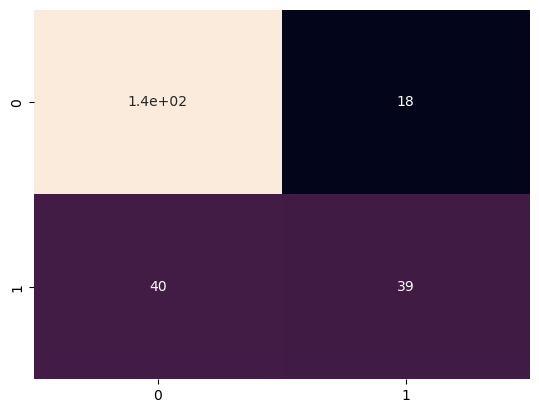

In [32]:
sns.heatmap(cm, annot = True, cbar = False)
plt.show()

In [33]:
model_accuracy = accuracy_score(y_train, y_pred)
model_accuracy

0.7573221757322176

In [34]:
clf1.intercept_ # alpha 

array([-0.89863522])

In [35]:
clf1.coef_ # beta values 

array([[ 0.61979205,  0.21976722,  0.35632629, -0.01725094, -0.72019276,
         0.14003954, -0.11198714,  0.76266595, -0.22740975, -0.22377748,
         0.04407158]])

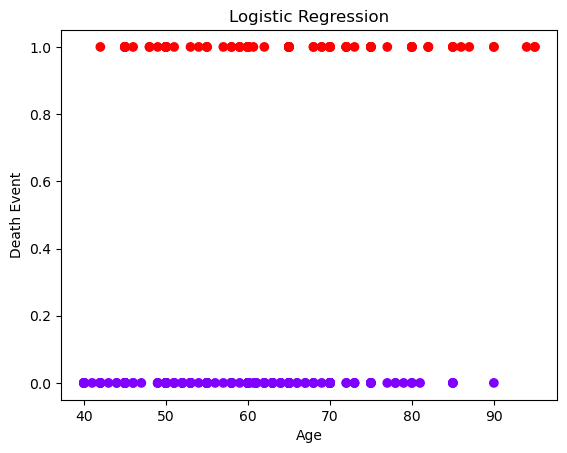

In [36]:
plt.scatter(X.age, y, c = y, cmap = 'rainbow')
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Death Event')
plt.show()

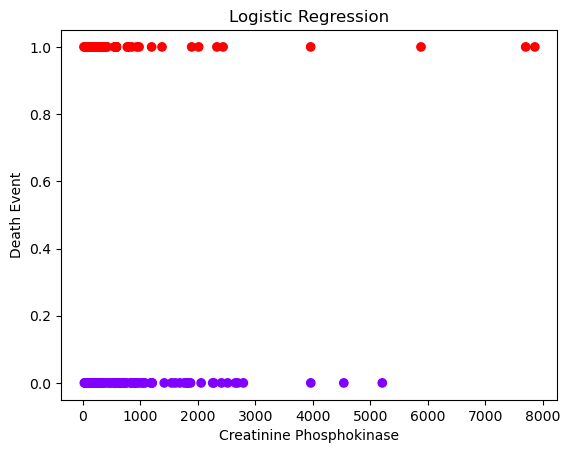

In [40]:
plt.scatter(X.creatinine_phosphokinase, y, c = y, cmap = 'rainbow')
plt.title('Logistic Regression')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Death Event')
plt.show()

In [39]:
# sns.pairplot(hfd, x_vars = None, y_vars = None, kind = 'scatter')

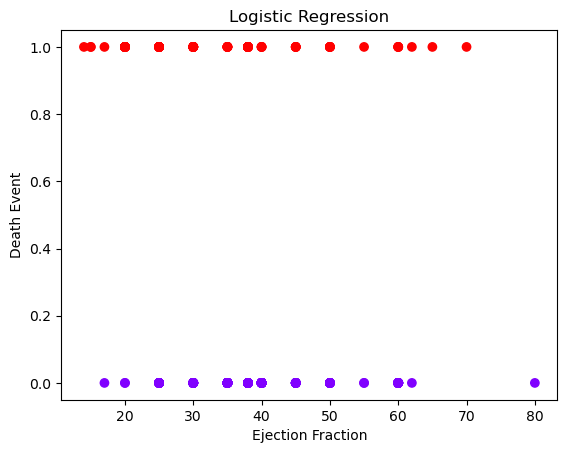

In [41]:
plt.scatter(X.ejection_fraction, y, c = y, cmap = 'rainbow')
plt.title('Logistic Regression')
plt.xlabel('Ejection Fraction')
plt.ylabel('Death Event')
plt.show()

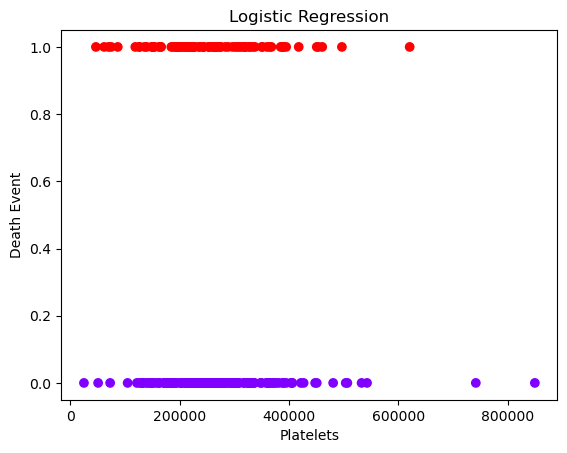

In [42]:
plt.scatter(X.platelets, y, c = y, cmap = 'rainbow')
plt.title('Logistic Regression')
plt.xlabel('Platelets')
plt.ylabel('Death Event')
plt.show()

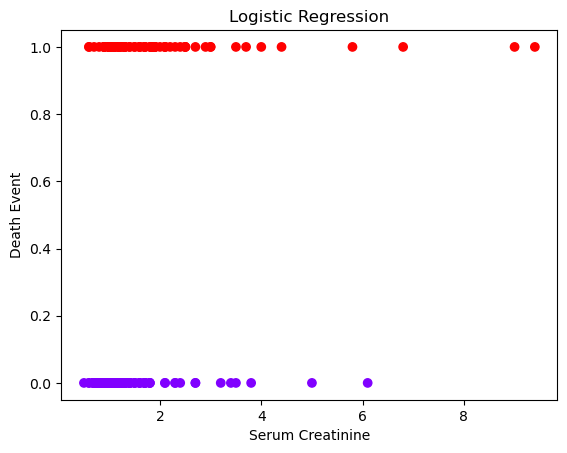

In [43]:
plt.scatter(X.serum_creatinine, y, c = y, cmap = 'rainbow')
plt.title('Logistic Regression')
plt.xlabel('Serum Creatinine')
plt.ylabel('Death Event')
plt.show()

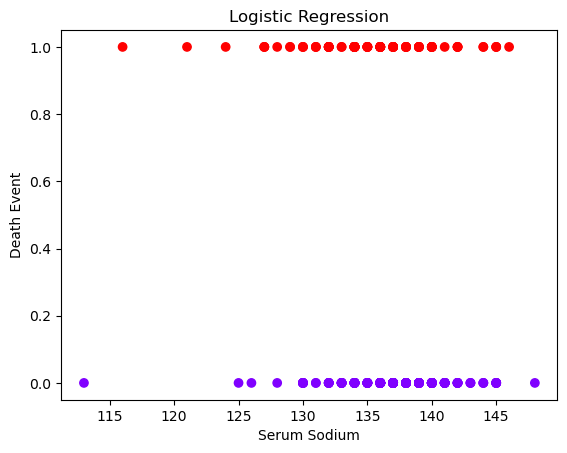

In [44]:
plt.scatter(X.serum_sodium, y, c = y, cmap = 'rainbow')
plt.title('Logistic Regression')
plt.xlabel('Serum Sodium')
plt.ylabel('Death Event')
plt.show()